### Libraries


In [1]:
# Data Processing and Cleaning
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

### Dataset

In [3]:
data=pd.read_csv("D:\Work\Datasets\Crop_recommendation.csv")

crop_data = data

# Display the dataset
print(crop_data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


<>:1: SyntaxWarning: invalid escape sequence '\W'
<>:1: SyntaxWarning: invalid escape sequence '\W'
C:\Users\ish21\AppData\Local\Temp\ipykernel_14776\757559498.py:1: SyntaxWarning: invalid escape sequence '\W'
  data=pd.read_csv("D:\Work\Datasets\Crop_recommendation.csv")


In [4]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
crop_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


### Data Pre-Processing and Data Handling

#### Null values

#### Duplicates

In [6]:
# Remove duplicate rows
crop_data = crop_data.drop_duplicates()

# Display the dataset
print(crop_data.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [7]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [8]:
crop_data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [9]:
#confirm by checking
# Check for row-wise duplicates (all columns)
duplicates = crop_data.duplicated()

# Display rows that are duplicates (except the first occurrence)
print(f"Row-wise duplicates:\n{crop_data[duplicates]}")

Row-wise duplicates:
Empty DataFrame
Columns: [N, P, K, temperature, humidity, ph, rainfall, label]
Index: []


In [10]:
crop_data.shape

(2200, 8)

In [11]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
#as we can seee the dataset has no empty values

#### Data Type Conversion

In [13]:
# Check and convert data types
print(crop_data.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [14]:
# convert a column to the appropriate type for any inconsistent value
crop_data['N'] = crop_data['N'].astype(int)
crop_data['P'] = crop_data['P'].astype(int)
crop_data['K'] = crop_data['K'].astype(int)
crop_data['temperature'] = crop_data['temperature'].astype(float)
crop_data['humidity'] = crop_data['humidity'].astype(float)
crop_data['ph'] = crop_data['ph'].astype(float)
crop_data['rainfall'] = crop_data['rainfall'].astype(float)
crop_data['label'] = crop_data['label'].astype('category')  # Categorical column


print(crop_data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


#### Missing Values

In [15]:
# Check for missing values
print(crop_data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [16]:
#no missing values are present in the dataset

### Exploratory Data Analysis (EDA)

#### Statistical Summary:
Check the statistical summary of the data to understand the distribution and range of values.

In [17]:
crop_data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


### Encoding Categorical Variables

#### Label Encoding
If your target variable (label) is categorical, you'll need to encode it numerically so that the machine learning models can process it.

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
crop_data['label'] = encoder.fit_transform(crop_data['label'])

In [19]:
# Display the label mappings

#LabelEncoder, it assigns integer labels to unique values in the input column. To access the label mapping, you can use the classes_ attribute
#The enumerate() function generates mappings between the labels and their encoded values.
label_mapping = {label: int(encoded_value) for encoded_value, label in enumerate(encoder.classes_)}
print("Label Mapping:", label_mapping)

Label Mapping: {'apple': 0, 'banana': 1, 'blackgram': 2, 'chickpea': 3, 'coconut': 4, 'coffee': 5, 'cotton': 6, 'grapes': 7, 'jute': 8, 'kidneybeans': 9, 'lentil': 10, 'maize': 11, 'mango': 12, 'mothbeans': 13, 'mungbean': 14, 'muskmelon': 15, 'orange': 16, 'papaya': 17, 'pigeonpeas': 18, 'pomegranate': 19, 'rice': 20, 'watermelon': 21}


In [20]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [21]:
#### One-Hot Encoding (if applicable):
# If there are multiple categories in your data, you might want to perform one-hot encoding on categorical columns. For example, 
# if your label has multiple unique values, one-hot encoding can be applied.


##### One-hot encoding the 'label' column (if it's not already numeric)
#crop_data = pd.get_dummies(crop_data, columns=['label'], drop_first=True)

#### Visualize the Data: 
Understand the relationships between variables, identify outliers, and assess the distribution of features.

#### UNIVARIATE ANALYSIS

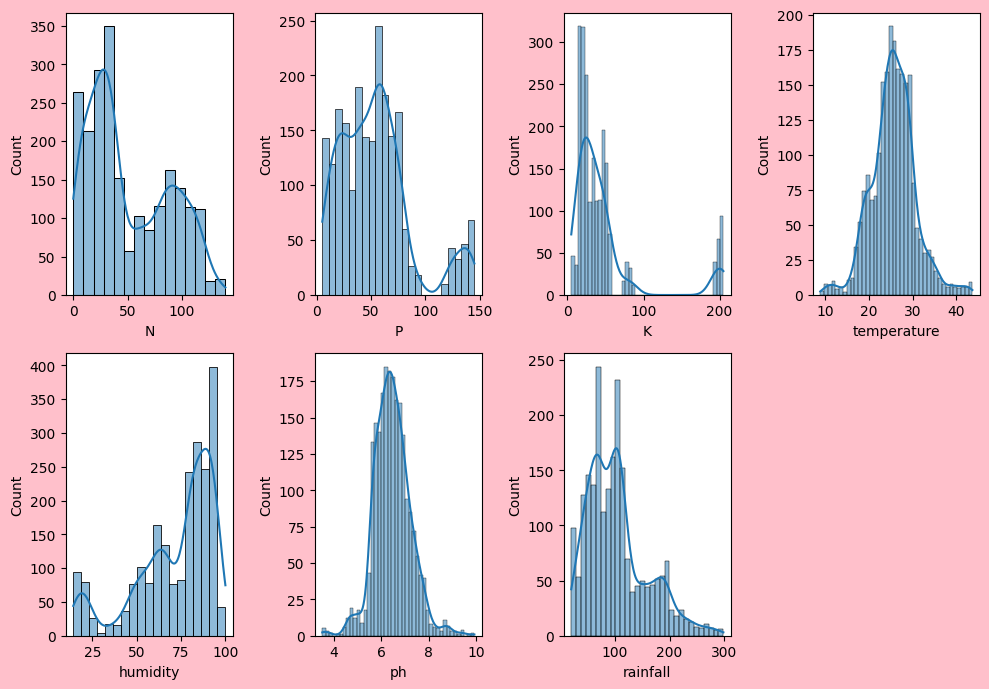

In [22]:
plt.figure(figsize=(10,7),facecolor='pink')
plotnumber=1
for column in crop_data:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.histplot(crop_data[column], kde=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### BIVARIATE ANALYSIS

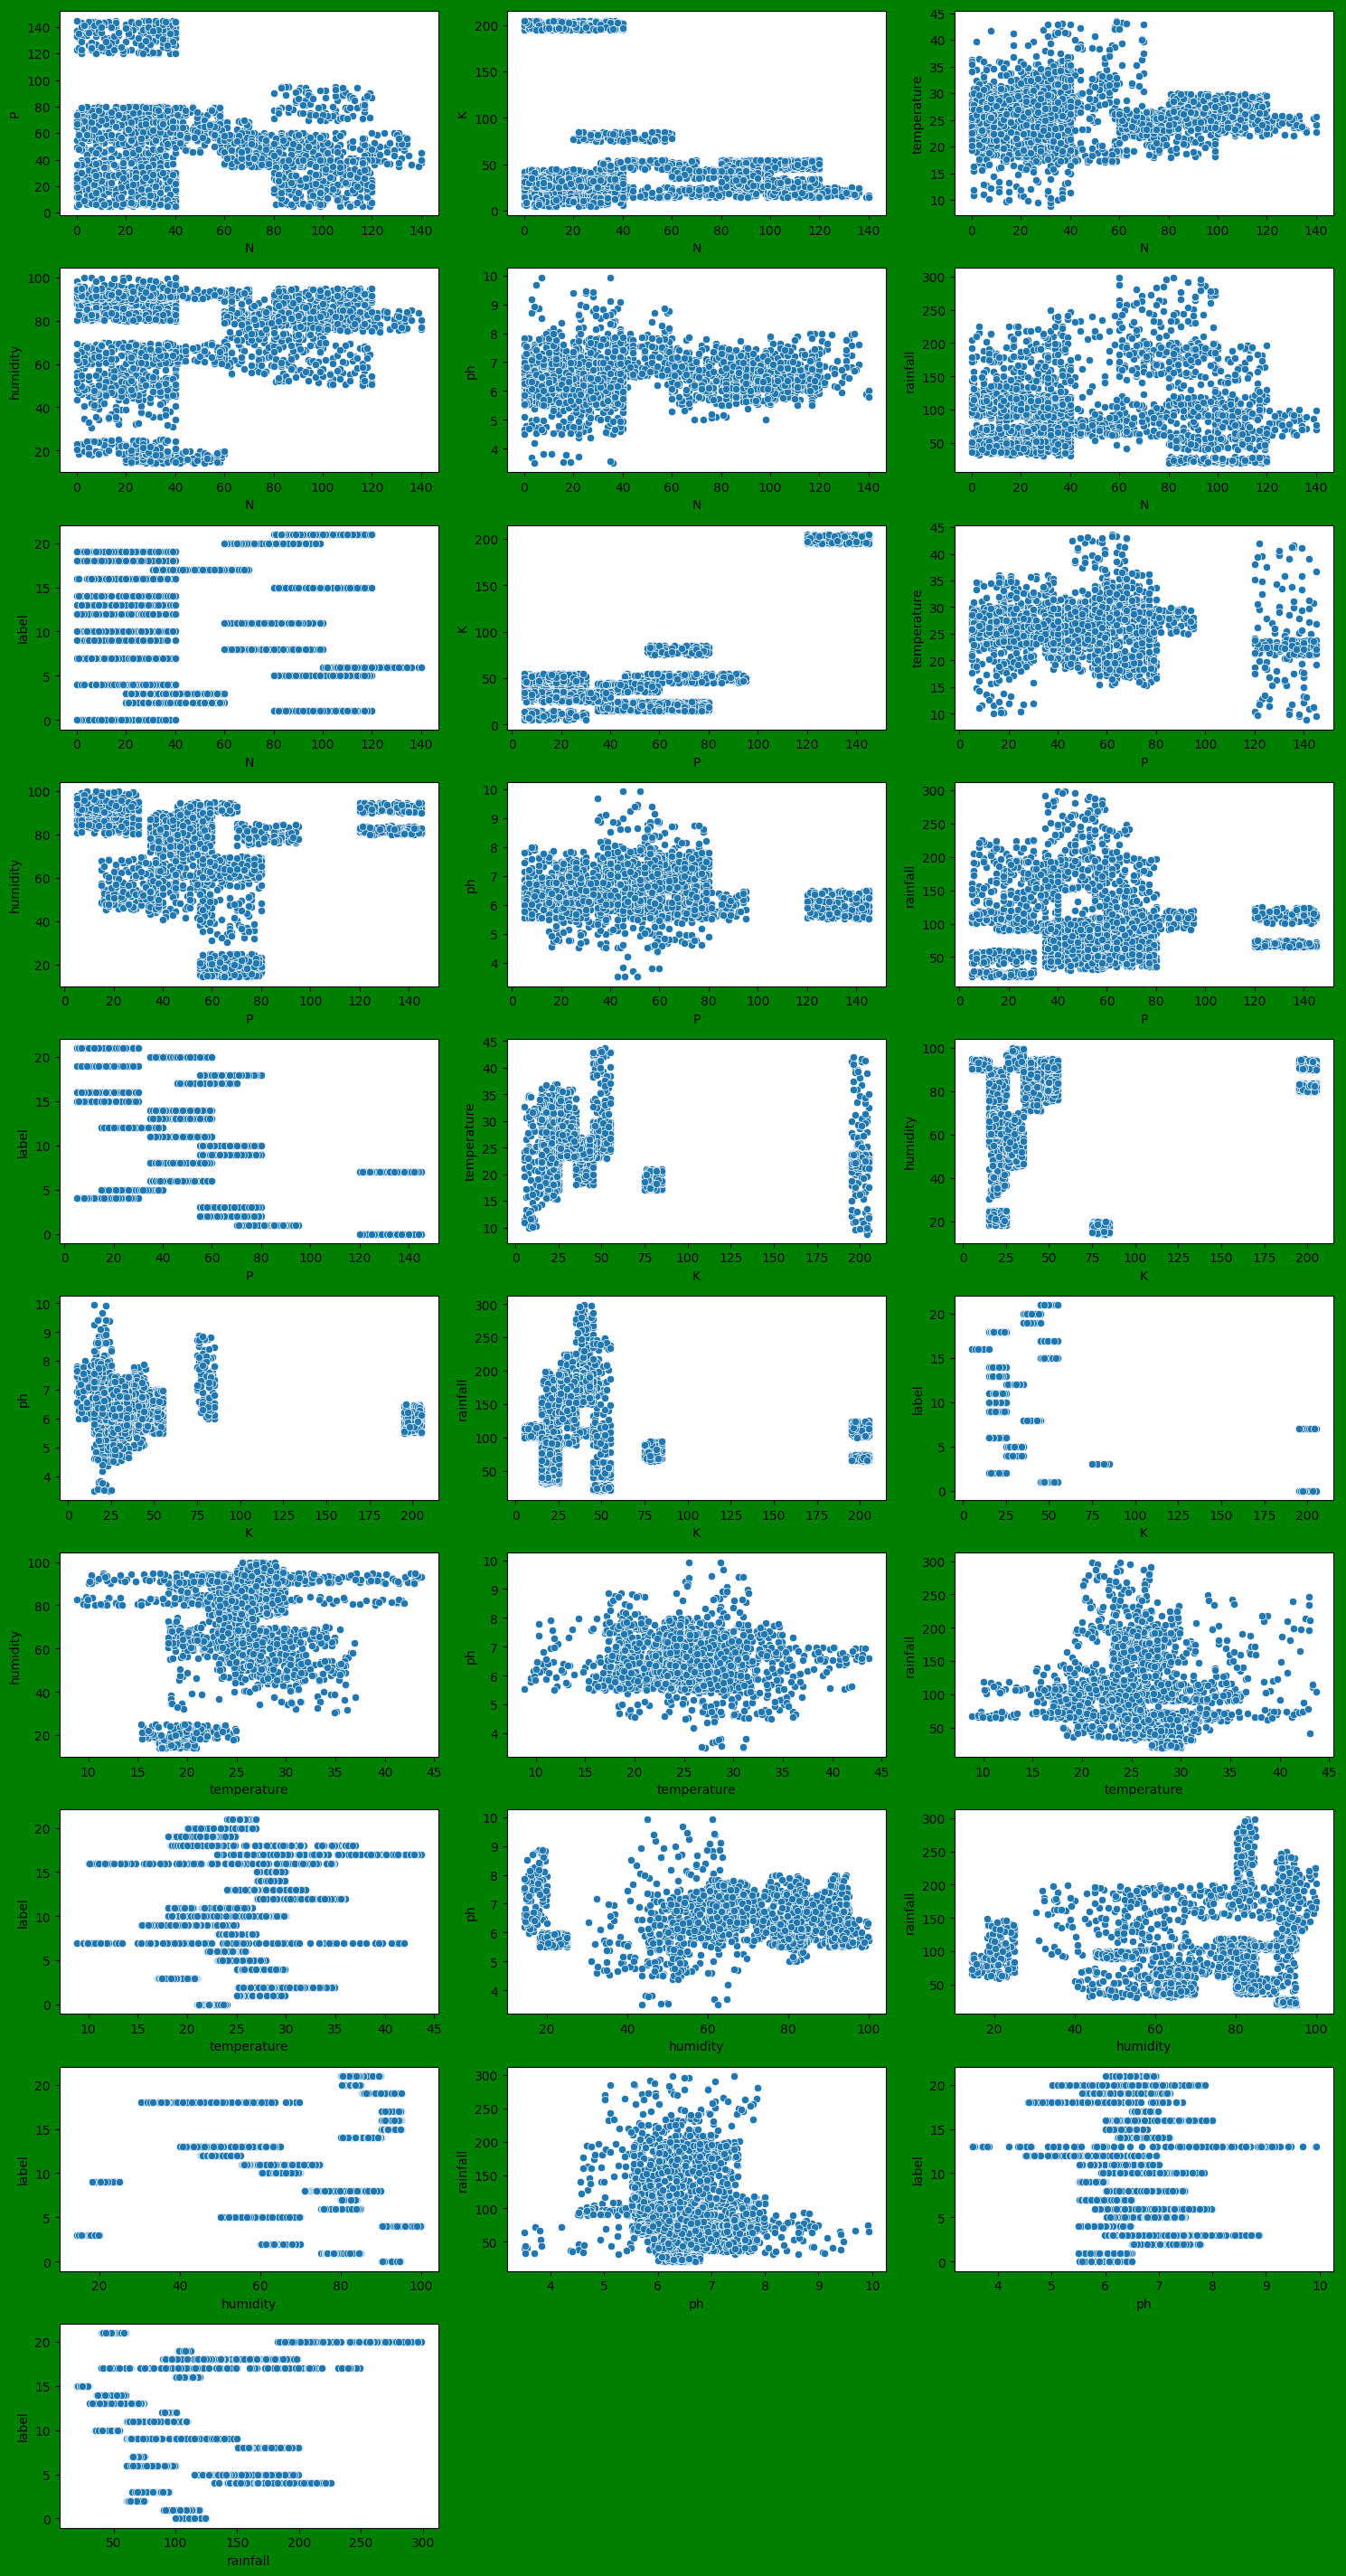

In [23]:
plt.figure(figsize=(15, 85), facecolor='green')

plotnumber = 1

# Get all columns except 'y'
columns = [col for col in crop_data.columns if col != 'y']

for i in range(len(crop_data.columns)):
    for j in range(i + 1, len(crop_data.columns)):
        if plotnumber <= 30:
            ax = plt.subplot(30, 3, plotnumber)  
            sns.scatterplot(x=crop_data.iloc[:, i], y=crop_data.iloc[:, j], ax=ax, data=crop_data)  
            ax.set_xlabel(crop_data.columns[i])  
            ax.set_ylabel(crop_data.columns[j])  
        plotnumber += 1

plt.tight_layout()
plt.show()

#### MULTIVARIATE ANALYSIS

##### Plotting Heatmap (Correaltion Matrix)

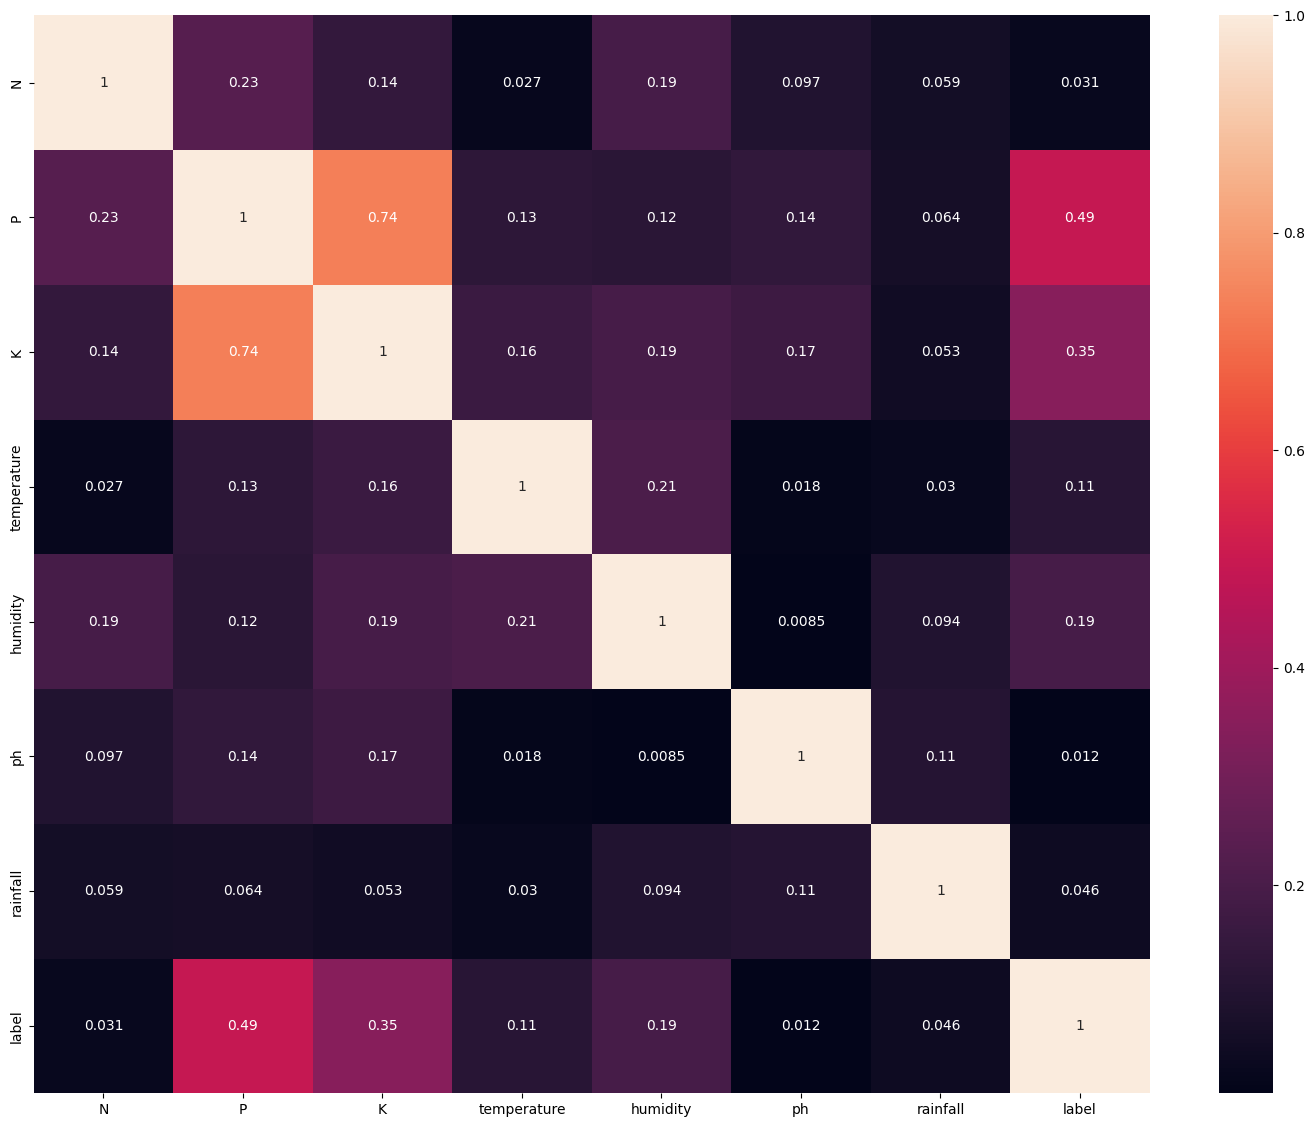

In [24]:

corr_mat=crop_data.corr().abs()# (ab But we need proof.solute value)This code will get the coefficient of one varible vs all other variable(Relationship)


plt.figure(figsize=(18,14))
sns.heatmap(corr_mat,annot=True,annot_kws={'size':10})
plt.show()

### Feature Scaling

#### Normalize or Standardize

If your features (e.g., temperature, humidity, ph, etc.) are on different scales, it's essential to normalize or standardize them to ensure they all have a similar range, which helps many machine learning algorithms perform better.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()
crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']] = scaler.fit_transform(crop_data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])

Then we are going to check relationship and multicollinearity problem.

The diagonal values are all 1, as each variable is perfectly correlated with itself.

### Train Test Split

In [27]:
#separate features and label/target
x=crop_data.drop(columns=['label'])
y=crop_data['label']

In [28]:
from sklearn.model_selection import train_test_split

#split training and testing dataset
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [29]:
xtrain.shape

(1650, 7)

In [30]:
ytrain.shape

(1650,)

### Standarize

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [33]:
x_scaled

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]], shape=(2200, 7))

### VIF (Variance Inflation Factor)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Finding Variance inflation factor is each scaled column i.e x_scaled.shape[1] (1/(1=R2))
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]

vif['Features']=x.columns
#Lets Check the Values 

vif

,vif,Features
0,1.097026,N
1,2.630465,P
2,2.797118,K
3,1.111104,temperature
4,1.368986,humidity
5,1.055803,ph
6,1.037426,rainfall


In [35]:
# all values between 1-5 therefore, multicollinearity doesn't exist

### Model Selection

#### Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf=RandomForestClassifier(random_state=42, n_estimators=100)

In [38]:
#train the model
rf.fit(xtrain,ytrain)

RandomForestClassifier(random_state=42)

In [39]:
#predict on test data set

ypred_rf=rf.predict(xtest)

In [40]:
#predicted values
print(ypred_rf)

[21 21  7  3  2 20 13  9 15  1 13  5 10 14 12  0  5 10  5 12  4  2  9  8
  6  5 10 16 13  9 19 20 11 15  4  6 12 12 21 13 11  2 18 21 18 14  9  9
  6 14 13  2  0 15 18  1 17 12 10  6 16 14 21 20 15  0  7  5  0 16  4 19
  9 11  7 13  3 11  8 12 20  2 21 21 15  6 11 10 13 17  2  8 14  7 14 11
  5  8 10  3 16  8 14  1  1 20 21  5 18 15 15 12  5  7 16 19 14 10 11  8
 19 10 16  3  3  2 19 16  3 17 13 13 15 14 11 14  4 19 16  2  2  7  0  5
  3  0  8 12 21 17 16  4 13  1 19  3 21  2  0  8 10 18  8  9  9 15 20 15
  1 16 18  0 13  4  6 14  9 19 17 16 20 17 17 18  9  1  4 18 20 17 11  8
 13 20 11  5 18  4  3 12  4 19 11 13 13 16 15 11 18  1  3  2 18 16 13 14
 12 17 15 19  8 20  2 17  2  5 11  5 16 20 13 14 16  9 19  4 12 14  6 20
  3 14  0 18  2 20 21  2 19 16 11  7  3 18  8 17 19  5 12 13  8 21 19 20
  7  4  8 10  3  5  5 17 19 11 20  3 18 16 19 18  4  9 19 15 13 12 10  1
  2 12  9 12  6 14 17  7  7 18 17  8 20  3 15  5 21 20  8 17  7 15  2 13
 13  3  2 12  1 12 19  8 16 15  3 10  6 17  7  9 10

Compare with actual values:

In [41]:
#actual values
print(ytest)

1320    21
1367    21
1291     7
264      3
728      2
        ..
1999     6
1171    12
2136     5
1882     4
938     19
Name: label, Length: 550, dtype: int64


In [42]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(ytest, ypred_rf)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(ytest, ypred_rf))

Random Forest Accuracy: 1.00

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24
           8       0.97      1.00      0.98        28
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        27
          16       1.00    

#### SVM

In [43]:
from sklearn.svm import SVC

In [44]:
# Initialize the SVM model
svm = SVC(kernel='linear')  # Linear kernel for simplicity

In [45]:
# Train the model
svm.fit(xtrain, ytrain)

SVC(kernel='linear')

In [46]:
# Make predictions on the test set
ypred_svm = svm.predict(xtest)

In [47]:
# Evaluate accuracy
accuracy = accuracy_score(ytest, ypred_svm)
print(f"SVM Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(ytest, ypred_svm))

SVM Accuracy: 0.9873

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24
           8       0.90      0.96      0.93        28
           9       0.96      1.00      0.98        23
          10       0.94      0.94      0.94        17
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        24
          13       0.97      0.97      0.97        29
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        27
          16       1.00      1.00  

#### Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
# Decision Tree Model
dt= DecisionTreeClassifier(random_state=42)

In [50]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier(random_state=42)

In [51]:
ypred_dt = dt.predict(xtest)

In [52]:
accuracy= accuracy_score(ytest, ypred_dt)
print(f"Decision Tree Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(classification_report(ytest, ypred_dt))

Decision Tree Accuracy: 0.9836

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      0.96      0.98        26
           3       0.93      1.00      0.97        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24
           8       1.00      0.79      0.88        28
           9       1.00      0.91      0.95        23
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        24
          13       0.97      1.00      0.98        29
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        27
          16       1.00  

#### Gaussian Naives Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

In [54]:
# Initialize the Naive Bayes model
nb= GaussianNB()

In [55]:
# Train the model
nb.fit(xtrain, ytrain)

GaussianNB()

In [56]:
# Make predictions on the test set
ypred_nb = nb.predict(xtest)

In [57]:
# Evaluate accuracy
accuracy_nb = accuracy_score(ytest, ypred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print("\nClassification Report:\n")
print(classification_report(ytest, ypred_nb))

Naive Bayes Accuracy: 0.9945

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        17
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        24
          13       1.00      1.00      1.00        29
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        27
          16       1.00    

### HyperParameter Tuning

#### Random Forest:

- Accuracy: 100%
- Strengths: Very high precision and recall for most classes, with excellent results in terms of F1-score.

In [58]:
from sklearn.model_selection import GridSearchCV

In [62]:
# Define parameter grid to search

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

In [63]:
# Initialize GridSearchCV to search through the parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [64]:
# Fit the model
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [65]:
# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Print the best parameters
print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [66]:
# Get the best model from the grid search
best_rf = grid_search.best_estimator_

In [67]:
# Make predictions
ypred_rf = best_rf.predict(xtest)

#### Accuracy Score and Classification Report

In [68]:
# Evaluate the model
print(f"Accuracy: {accuracy_score(ytest, ypred_rf):.4f}")
print("\nClassification Report:\n")
print(classification_report(ytest, ypred_rf))

Accuracy: 0.9964

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        24
           6       1.00      1.00      1.00        21
           7       1.00      1.00      1.00        24
           8       0.97      1.00      0.98        28
           9       1.00      1.00      1.00        23
          10       1.00      0.94      0.97        17
          11       1.00      1.00      1.00        22
          12       1.00      1.00      1.00        24
          13       0.97      1.00      0.98        29
          14       1.00      1.00      1.00        27
          15       1.00      1.00      1.00        27
          16       1.00      1.00      

#### Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred_rf)

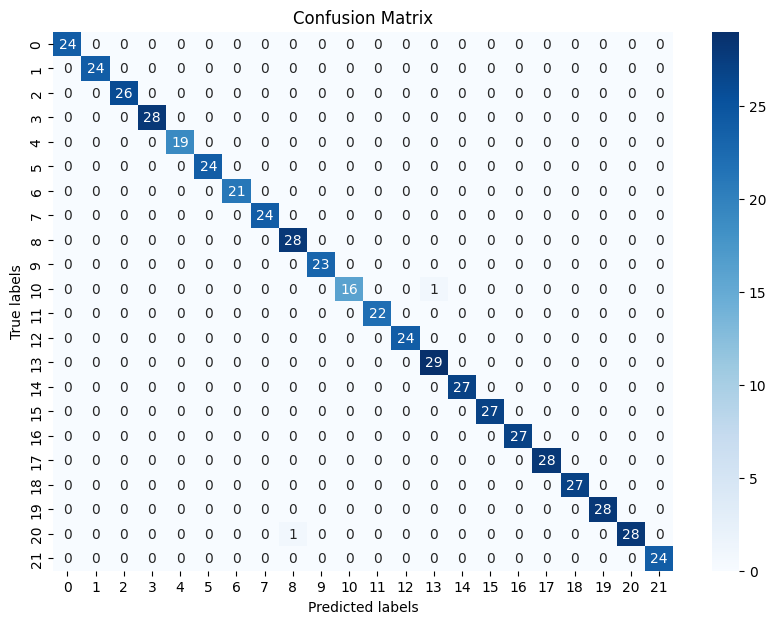

In [70]:
# Plot confusion matrix as a heatmap

#sns.heatmap(): Creates a heatmap of the confusion matrix.
#annot=True: Annotates each cell with its value.
#fmt='d': Formats the numbers as integers.
#cmap='Blues': Sets the color palette to a blue color map.
#xticklabels and yticklabels: Labels the axes based on the number of classes.

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(cm.shape[1]), yticklabels=np.arange(cm.shape[0]))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save the plot as an image
plt.savefig('confusion_matrix.png')

# Optionally, display the image
plt.show()

#### Saving the model

In [71]:
import joblib

# Assuming your model is trained and named 'model'
joblib.dump(rf, 'rf_crs.pkl')

['rf_crs.pkl']